Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## EDA

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Finding & Dropping Nulls

In [6]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [7]:
df = df.dropna().reset_index()

Dropping Undesired Columns

In [8]:
df_colwanted = df.drop(['date', 
                        'view', 
                        'sqft_above',
                        'sqft_basement', 
                        'yr_renovated', 
                        'address', 
                        'lat', 
                        'long',
                        'id'
                       ], axis=1)

In [9]:
df_colwanted.head(2)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built
0,0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969
1,1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950


### EDA Visualizations

<AxesSubplot:>

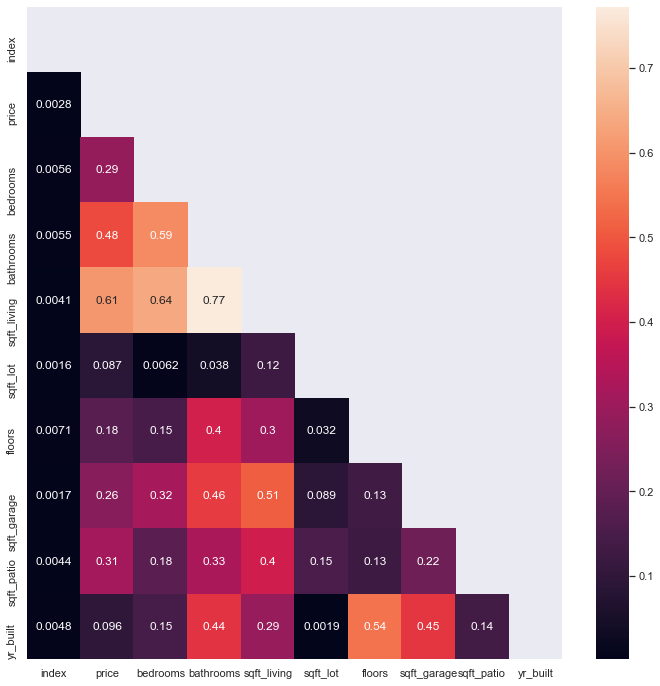

In [10]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df_colwanted.corr()))
sns.heatmap(abs(df_colwanted.corr()), annot=True, mask=mask)

In [11]:
#pairplot with continuous variables
#commented out for run-time

#sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_patio']])

In [12]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

<AxesSubplot:xlabel='price', ylabel='Count'>

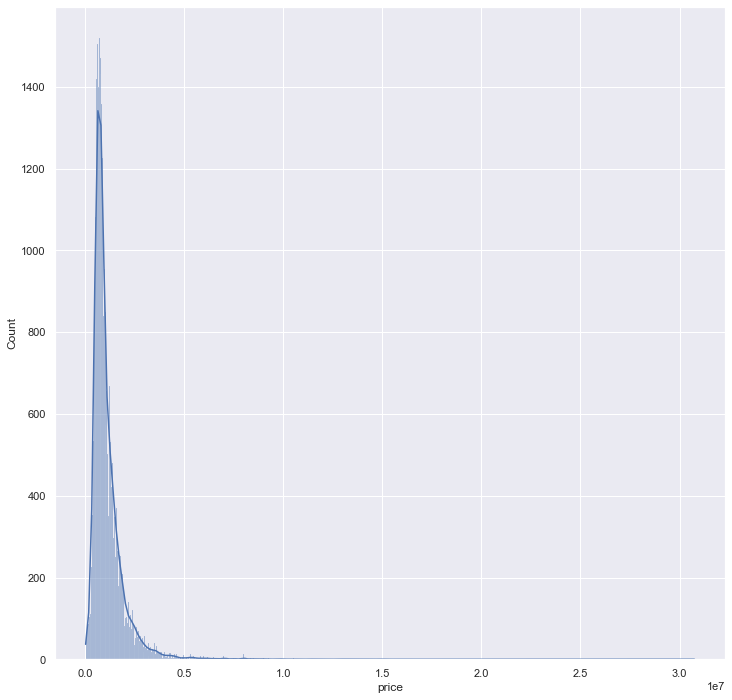

In [13]:
sns.histplot(df_colwanted.price, kde=True)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

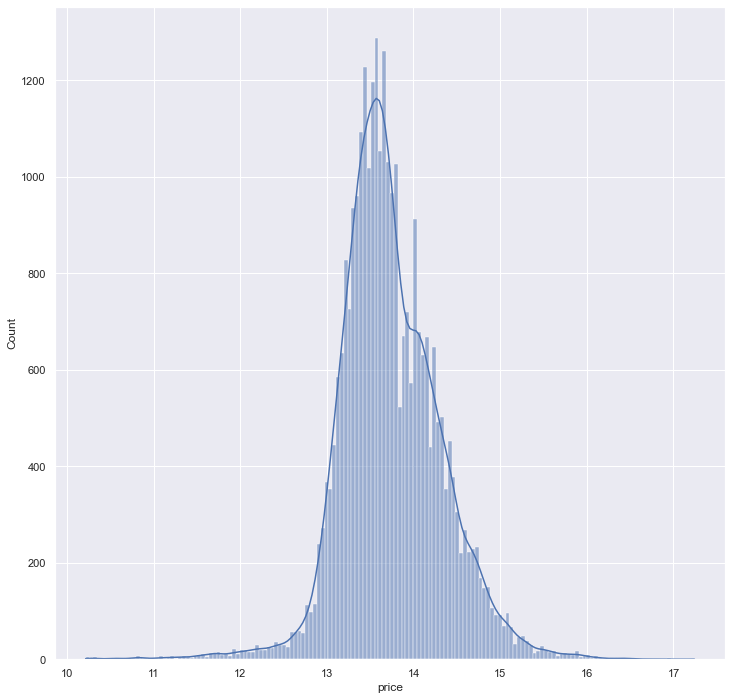

In [14]:
#logscaling target
y_scld = np.log(df_colwanted.price)
sns.histplot(y_scld, kde=True)

### EDA - Baseline OLS Model

In [15]:
y = df.price
X = df[['sqft_living', 'sqft_lot', 'sqft_patio']]

In [16]:
model_base = sm.OLS(y, sm.add_constant(X))
results_base = model_base.fit()
results_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6064.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:35:25   Log-Likelihood:            -4.4832e+05
No. Observations:               30111   AIC:                         8.966e+05
Df Residuals:                   30107   BIC:                         8.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.759e+04   9751.208     -7.956      0.000   -9.67e+04   -5.85e+04
sqft_living   528.9107      4.575    115.605      0.000     519.943     537.878
sqft_lot        0.0464      0.069      0.672      0.502      -0.089       0.182
sqft_patio    312.7786     18.239     17.149      0.000     277.029     348.528
==============================================================================
Omnibus:                    43140.750   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45972551.037
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     193.734   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#need to create markdown and comment on this here!

### EDA - Log Scaled OLS Model

In [18]:
#logscaled target model
model_yscld = sm.OLS(y_scld, sm.add_constant(X))
results_yscld_base = model_yscld.fit()
results_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6462.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:35:25   Log-Likelihood:                -18944.
No. Observations:               30111   AIC:                         3.790e+04
Df Residuals:                   30107   BIC:                         3.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9485      0.006   2070.495      0.000      12.936      12.961
sqft_living     0.0004   2.93e-06    120.629      0.000       0.000       0.000
sqft_lot     6.312e-09   4.43e-08      0.143      0.887   -8.05e-08    9.31e-08
sqft_patio      0.0002   1.17e-05     15.311      0.000       0.000       0.000
==============================================================================
Omnibus:                     5961.142   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50165.584
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#need to create markdown and comment on this here!

### EDA - Log Scaled OLS
(dropping columns to address multicolinearity)

In [20]:
X_new = df[['sqft_living']]

In [21]:
#logscaled target model
newmodel_yscld = sm.OLS(y_scld, sm.add_constant(X_new))
newresults_yscld_base = newmodel_yscld.fit()
newresults_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:35:25   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      0.000      12.937      12.962
sqft_living     0.0004    2.7e-06    137.836      0.000       0.000       0.000
==============================================================================
Omnibus:                     5867.888   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49915.366
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [22]:
ohe = OneHotEncoder(drop='first')

In [23]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source
#4:grade
#5:sewer system
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source', 'grade', 'sewer_system']

ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())


ohe_all.head()


,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,x0_4.5,x0_5.0,...,x4_3 Poor,x4_4 Low,x4_5 Fair,x4_6 Low Average,x4_7 Average,x4_8 Good,x4_9 Better,x5_PRIVATE RESTRICTED,x5_PUBLIC,x5_PUBLIC RESTRICTED
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Concatenate

In [24]:
X_cat = pd.concat([X_new,ohe_all], axis=1)

In [25]:
X_cat.head(2)

,sqft_living,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,x0_4.5,...,x4_3 Poor,x4_4 Low,x4_5 Fair,x4_6 Low Average,x4_7 Average,x4_8 Good,x4_9 Better,x5_PRIVATE RESTRICTED,x5_PUBLIC,x5_PUBLIC RESTRICTED
0,1180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2770,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
scaled_oheall_model = sm.OLS(y_scld, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     468.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:35:26   Log-Likelihood:                -16860.
No. Observations:               30111   AIC:                         3.384e+04
Df Residuals:                   30053   BIC:                         3.432e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.6875      0.090    152.823      0.000      13.512      13.863
sqft_living               0.0002   5.45e-06     41.078      0.000       0.000       0.000
x0_0.5                    0.8551      0.223      3.834      0.000       0.418       1.292
x0_1.0                    0.5693      0.116      4.904      0.000       0.342       0.797
x0_1.5                    0.5354      0.116      4.600      0.000       0.307       0.764
x0_2.0                    0.5929      0.116      5.107      0.000       0.365       0.820
x0_2.5                    0.5299      0.116      4.564      0.000       0.302       0.757
x0_3.0                    0.6044      0.116      5.201      0.000       0.377       0.832
x0_3.5                    0.6252      0.116      5.371      0.000       0.397       0.853
x0_4.0                    0.6448      0.117      5.499      0.000       0.415       0.875
x0_4.5                    0.6718      0.118      5.703      0.000       0.441       0.903
x0_5.0                    0.6664      0.122      5.468      0.000       0.428       0.905
x0_5.5                    0.6164      0.124      4.963      0.000       0.373       0.860
x0_6.0                    0.7468      0.133      5.595      0.000       0.485       1.008
x0_6.5                    0.8153      0.146      5.603      0.000       0.530       1.101
x0_7.0                    0.6942      0.172      4.029      0.000       0.356       1.032
x0_7.5                    0.6204      0.174      3.564      0.000       0.279       0.962
x0_8.0                    0.7111      0.336      2.118      0.034       0.053       1.369
x0_8.5                    1.0084      0.448      2.253      0.024       0.131       1.886
x0_9.5                    0.5985      0.440      1.359      0.174      -0.265       1.462
x0_10.0                  -1.1103      0.447     -2.486      0.013      -1.986      -0.235
x0_10.5                  -0.7057      0.443     -1.593      0.111      -1.574       0.163
x1_1                     -0.4349      0.095     -4.597      0.000      -0.620      -0.249
x1_2                     -0.6340      0.093     -6.853      0.000      -0.815      -0.453
x1_3                     -0.6664      0.093     -7.203      0.000      -0.848      -0.485
x1_4                     -0.6930      0.093     -7.474      0.000      -0.875      -0.511
x1_5                     -0.7101      0.093     -7.623      0.000      -0.893      -0.528
x1_6                     -0.7067      0.095     -7.447      0.000      -0.893      -0.521
x1_7                     -0.7612      0.105     -7.265      0.000      -0.967      -0.556
x1_8                     -0.6973      0.116     -5.987      0.000      -0.926      -0.469
x1_9                     -0.7677      0.148     -5.179      0.000      -1.058      -0.477
x1_10                  

Variables to be dropped (not significant):
-x0_9.5
-x0_10.5
-x1_11
-x2_Fair
-x3_Oil/Solar
-x3_Other
-x4_13 Mansion
-x5_PRIVATE RESTRICTED
-x5_PUBLIC RESTRICTED

### EDA - New OHE Model Dropping Insignificant Features

In [27]:
ohe_sig = OneHotEncoder(drop='first')

In [28]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source
#4:grade
#5:sewer system
ohe_all_sig = ohe_all.drop([
    'x0_9.5',
    'x0_10.5',
    'x1_11',
    'x2_Fair',
    'x3_Oil/Solar',
    'x3_Other',
    'x4_13 Mansion',
    'x5_PRIVATE RESTRICTED',
    'x5_PUBLIC RESTRICTED'], axis=1)

In [29]:
X_cat_sig = pd.concat([X_new,ohe_all_sig], axis=1)

In [30]:
scaled_oheallsig_model = sm.OLS(y_scld, sm.add_constant(X_cat_sig)).fit()
scaled_oheallsig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     555.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:35:27   Log-Likelihood:                -16867.
No. Observations:               30111   AIC:                         3.383e+04
Df Residuals:                   30062   BIC:                         3.424e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.6754      0.087    156.447      0.000      13.504      13.847
sqft_living              0.0002   5.37e-06     41.535      0.000       0.000       0.000
x0_0.5                   0.8641      0.218      3.958      0.000       0.436       1.292
x0_1.0                   0.5775      0.107      5.398      0.000       0.368       0.787
x0_1.5                   0.5434      0.107      5.066      0.000       0.333       0.754
x0_2.0                   0.6010      0.107      5.621      0.000       0.391       0.811
x0_2.5                   0.5381      0.107      5.035      0.000       0.329       0.748
x0_3.0                   0.6128      0.107      5.729      0.000       0.403       0.822
x0_3.5                   0.6336      0.107      5.915      0.000       0.424       0.844
x0_4.0                   0.6527      0.108      6.050      0.000       0.441       0.864
x0_4.5                   0.6792      0.108      6.263      0.000       0.467       0.892
x0_5.0                   0.6743      0.113      5.985      0.000       0.454       0.895
x0_5.5                   0.6223      0.115      5.406      0.000       0.397       0.848
x0_6.0                   0.7475      0.125      5.991      0.000       0.503       0.992
x0_6.5                   0.8137      0.137      5.928      0.000       0.545       1.083
x0_7.0                   0.6970      0.165      4.215      0.000       0.373       1.021
x0_7.5                   0.6055      0.166      3.650      0.000       0.280       0.931
x0_8.0                   0.6270      0.320      1.962      0.050       0.001       1.253
x0_8.5                   1.0206      0.445      2.294      0.022       0.149       1.893
x0_10.0                 -1.0923      0.444     -2.462      0.014      -1.962      -0.223
x1_1                    -0.4274      0.090     -4.753      0.000      -0.604      -0.251
x1_2                    -0.6266      0.088     -7.150      0.000      -0.798      -0.455
x1_3                    -0.6589      0.088     -7.519      0.000      -0.831      -0.487
x1_4                    -0.6849      0.088     -7.796      0.000      -0.857      -0.513
x1_5                    -0.7013      0.088     -7.945      0.000      -0.874      -0.528
x1_6                    -0.6987      0.090     -7.767      0.000      -0.875      -0.522
x1_7                    -0.7504      0.100     -7.476      0.000      -0.947      -0.554
x1_8                    -0.6868      0.113     -6.104      0.000      -0.907      -0.466
x1_9                    -0.7536      0.145     -5.197      0.000      -1.038      -0.469
x1_10                   -0.7650      0.267     -2.865      0.004      -1.289      -0.242
x1_13                   -2.1534      0.437     -4.922      0.000      -3.011      -1.296
x2_Good                  0.0875      0.006     14.942    

-Same R-squared as previous model  
-lower Cond No implies less multicollinearity  
-Durbin-Watson between 1 and 2 implies Homoscedasticity (even distribution of errors, they have similar variances)  
-High Jarque-Bera implies errors not normally distributed


### EDA - Feature Engineering and Polynomial Features

In [31]:
df_colwanted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30111 entries, 0 to 30110
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         30111 non-null  int64  
 1   price         30111 non-null  float64
 2   bedrooms      30111 non-null  int64  
 3   bathrooms     30111 non-null  float64
 4   sqft_living   30111 non-null  int64  
 5   sqft_lot      30111 non-null  int64  
 6   floors        30111 non-null  float64
 7   waterfront    30111 non-null  object 
 8   greenbelt     30111 non-null  object 
 9   nuisance      30111 non-null  object 
 10  condition     30111 non-null  object 
 11  grade         30111 non-null  object 
 12  heat_source   30111 non-null  object 
 13  sewer_system  30111 non-null  object 
 14  sqft_garage   30111 non-null  int64  
 15  sqft_patio    30111 non-null  int64  
 16  yr_built      30111 non-null  int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 3.9+ MB


In [32]:
#sns.histplot(df_colwanted.sqft_, bins=int(np.sqrt(len(df_colwanted))), kde=True)

In [33]:
#X_cat = pd.concat([X_new,ohe_all], axis=1)

In [34]:
pf = PolynomialFeatures(degree=2)
pf.fit(X_cat_sig)

PolynomialFeatures()

In [35]:
pdf = pd.DataFrame(pf.transform(X_cat_sig), columns=pf.get_feature_names())

In [36]:
pdf.head()

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x44^2,x44 x45,x44 x46,x44 x47,x45^2,x45 x46,x45 x47,x46^2,x46 x47,x47^2
0,1.0,1180.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2770.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2880.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2160.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,1120.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
polydf = pd.concat([pdf, y_scld], axis=1)

In [38]:
polydf.corr()['price'].sort_values(ascending=False)

price      1.000000
x0         0.621995
x0^2       0.557140
x0 x34     0.473329
x0 x47     0.459182
             ...   
x43 x45         NaN
x43 x46         NaN
x44 x45         NaN
x44 x46         NaN
x45 x46         NaN
Name: price, Length: 1226, dtype: float64

### Ordinal Encoding Grade and Condition

In [39]:
df.grade.value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [49]:
# ordinally encoding grade
grade_df = df[['grade']]
grade_cats = [['2 Substandard',
               '3 Poor',
               '4 Low',
               '5 Fair',
               '6 Low Average',
               '7 Average',
               '8 Good',
               '9 Better',
               '10 Very Good',
               '11 Excellent',
               '12 Luxury',
               '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cats)
ords_grade.fit(grade_df)
ords_grade.transform(grade_df)
grades_encoded = pd.DataFrame(ords_grade.transform(grade_df))
grades_encoded.head()

,0
0,5.0
1,5.0
2,5.0
3,7.0
4,5.0


In [50]:
df.condition.value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [51]:
# ordinally encoding condition
cond_df = df[['condition']]
cond_cats = [['Poor',
              'Fair',
              'Average',
              'Good',
              'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cats)
ords_cond.fit(cond_df)
ords_cond.transform(cond_df)
cond_encoded = pd.DataFrame(ords_cond.transform(cond_df))
cond_encoded.head()

,0
0,3.0
1,2.0
2,2.0
3,2.0
4,2.0


In [55]:
ordinal_df = pd.concat([grades_encoded, cond_encoded], axis=1)
ordinal_df.columns = ['grade', 'condition']

In [56]:
ordinal_df.head()

,grade,condition
0,5.0,3.0
1,5.0,2.0
2,5.0,2.0
3,7.0,2.0
4,5.0,2.0
